In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as pylab
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt 
import joblib
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression 




In [2]:

# Load your data
data = pd.read_excel("data/Query333.xlsx")



In [3]:
# Parse the date column
data['تاريخ الصفقة'] = pd.to_datetime(data['تاريخ الصفقة'], format='%d/%m/%Y')

# Extract date features
data['dd'] = data['تاريخ الصفقة'].dt.day
data['mm'] = data['تاريخ الصفقة'].dt.month
data['yyyy'] = data['تاريخ الصفقة'].dt.year

# Define the columns for features and targets
features_columns = ['التصنيف2', 'النوع2', 'area', 'الحي2', 'dd', 'mm', 'yyyy']
target_columns = ['asdd']


C:\Users\admin\AppData\Local\Temp\ipykernel_23356\3207125009.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5,


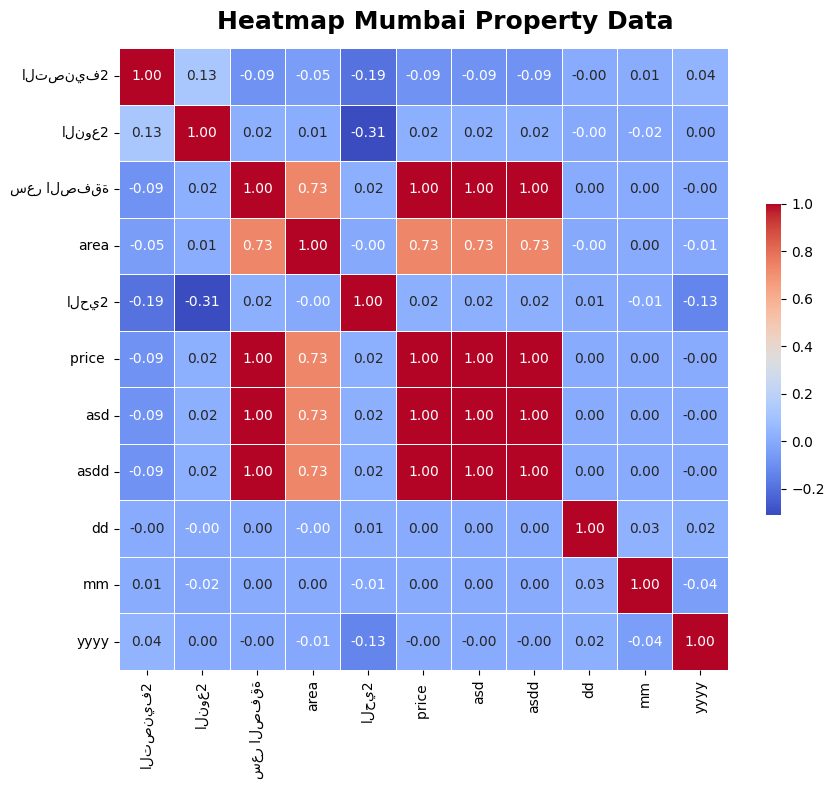

In [4]:
fig = plt.figure(figsize=(9, 8))
rcParams = {'xtick.labelsize': '14',
            'ytick.labelsize': '14', 'axes.labelsize': '16'}
sns.heatmap(data.corr(), annot=True, linewidths=.5,
            cbar_kws={"shrink": .5}, fmt='.2f', cmap='coolwarm')
fig.suptitle('Heatmap Mumbai Property Data', fontsize=18, fontweight="bold")
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

fig.savefig('Heatmap_Encoding', dpi=250)


In [5]:
decision_tree_regressor = DecisionTreeRegressor()
xgboost_regressor = XGBRegressor()
gradient_boosting_regressor = GradientBoostingRegressor()


In [6]:
def create_voting_regressor():
    return VotingRegressor(estimators=[
        ('DecisionTreeRegressor', decision_tree_regressor),
        ('XGBoostRegressor', xgboost_regressor),
        ('GradientBoostingRegressor', gradient_boosting_regressor),
    ], weights=[1,3, 2])  # Specify equal weights for simplicity


In [7]:

# Splitting data into features and targets
X = data[features_columns]
y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# List of models to train
models = {
    "GradientBoosting": GradientBoostingRegressor(),
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    # verbosity = 2, learning_rate = 0.1, subsample = 0.3, max_depth = 10
    "DecisionTree": DecisionTreeRegressor(),
    "Bagging": BaggingRegressor(),  # Bagging ensemble
    "AdaBoost": AdaBoostRegressor(),  # AdaBoost ensemble
    "VotingRegressor": create_voting_regressor(),
    # K-Nearest Neighbors (KNN) with K=3
    "KNN_3": KNeighborsRegressor(n_neighbors=3),
    # K-Nearest Neighbors (KNN) with K=5
    "KNN_5": KNeighborsRegressor(n_neighbors=5),
    # K-Nearest Neighbors (KNN) with K=7
    "KNN_7": KNeighborsRegressor(n_neighbors=7)  ,
    "KNN_7": KNeighborsRegressor(n_neighbors=21),
    "KNN_7": KNeighborsRegressor(n_neighbors=63), 
    "SVR": SVR(),  # Support Vector Machine (SVM) Regression
    "LogisticRegression": LogisticRegression(),

}


In [8]:


# Define a directory to save trained models
model_dir = "trained_models_ai6-2_revel/"

# Create the directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)



In [9]:

def calculate_percent_accuracy(y_true, y_pred):
    r_squared = r2_score(y_true, y_pred)
    percent_accuracy = r_squared * 100
    return percent_accuracy



In [10]:
def get_regression_metrics(name, trained_model, x_train, y_train, x_test, y_test):
      # Predictions on training data
      train_predict = trained_model.predict(x_train)

      # Predictions on test data
      test_predict = trained_model.predict(x_test)
      # Save the trained model to a file
      model_file_path = os.path.join(model_dir, f"{name}.pkl")
      joblib.dump(trained_model, model_file_path)
      print(f"{name} model saved as {model_file_path}")
      
      print("____ Training Data _____")
      print(f"{name} Regression Metrics (Training Data):")
      print("MSE Mean Squared Error [TRAIN]:",
          mean_squared_error(y_train, train_predict))
      print("R-squared [TRAIN]:", r2_score(y_train, train_predict))
      print("MAE Mean Absolute Error [TRAIN]:",
          mean_absolute_error(y_train, train_predict))

      # Calculate and print percent accuracy for training data
      train_percent_accuracy = calculate_percent_accuracy(y_train, train_predict)
      print(f"{name} Percent Accuracy (Training Data): {train_percent_accuracy:.2f}%")
      print("____ Testing Data _____")

      print(f"{name} Regression Metrics (Test Data):")
      print("MSE Mean Squared Error [TEST]:",
          mean_squared_error(y_test, test_predict))
      print("R-squared [TEST]:", r2_score(y_test, test_predict))
      print("MAE Mean Absolute Error [TEST]:",
          mean_absolute_error(y_test, test_predict))

      # Calculate and print percent accuracy for test data
      test_percent_accuracy = calculate_percent_accuracy(y_test, test_predict)
      print(f"{name} Percent Accuracy (Test Data): {test_percent_accuracy:.2f}%")

      # Visual Inspection: Scatter plot of True vs. Predicted values for test data
      plt.scatter(y_test, test_predict)
      plt.xlabel('True Values')
      plt.ylabel('Predictions')
      plt.title(name + ' Predictions vs. True Values (Test Data)')
      plt.show()

     


GradientBoosting model saved as trained_models_ai6-2_revel/GradientBoosting.pkl
____ Training Data _____
GradientBoosting Regression Metrics (Training Data):
MSE Mean Squared Error [TRAIN]: 10254423.319339667
R-squared [TRAIN]: 0.9154101515065645
MAE Mean Absolute Error [TRAIN]: 556.5269401521016
GradientBoosting Percent Accuracy (Training Data): 91.54%
____ Testing Data _____
GradientBoosting Regression Metrics (Test Data):
MSE Mean Squared Error [TEST]: 9469970.409836808
R-squared [TEST]: 0.8989789359360378
MAE Mean Absolute Error [TEST]: 558.2748075952113
GradientBoosting Percent Accuracy (Test Data): 89.90%


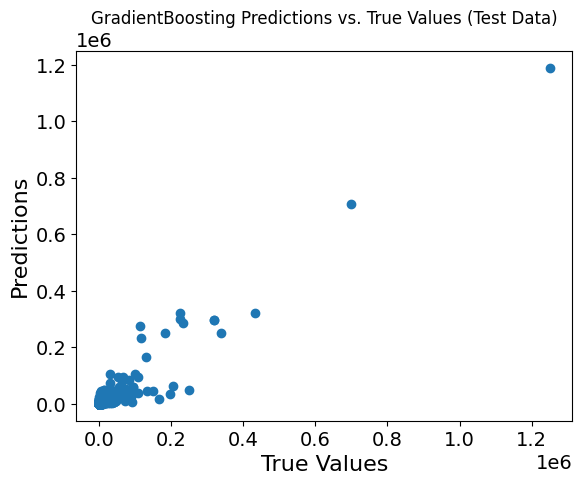

RandomForest model saved as trained_models_ai6-2_revel/RandomForest.pkl
____ Training Data _____
RandomForest Regression Metrics (Training Data):
MSE Mean Squared Error [TRAIN]: 4818469.840777624
R-squared [TRAIN]: 0.9602519204534053
MAE Mean Absolute Error [TRAIN]: 181.13664113590448
RandomForest Percent Accuracy (Training Data): 96.03%
____ Testing Data _____
RandomForest Regression Metrics (Test Data):
MSE Mean Squared Error [TEST]: 14537001.123926789
R-squared [TEST]: 0.844926303010127
MAE Mean Absolute Error [TEST]: 412.9066843269754
RandomForest Percent Accuracy (Test Data): 84.49%


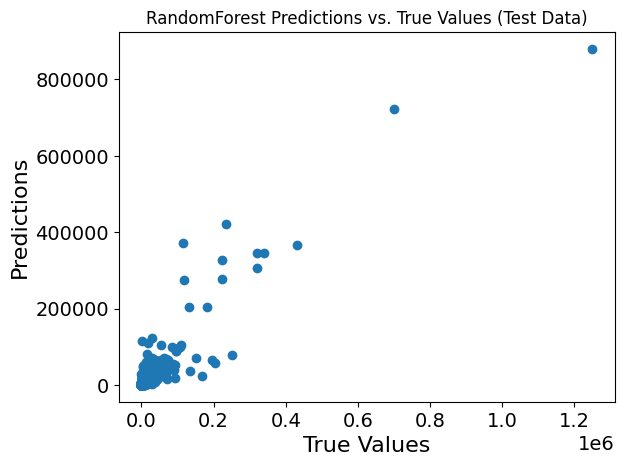

XGBoost model saved as trained_models_ai6-2_revel/XGBoost.pkl
____ Training Data _____
XGBoost Regression Metrics (Training Data):
MSE Mean Squared Error [TRAIN]: 1168924.7782163396
R-squared [TRAIN]: 0.9903574129124298
MAE Mean Absolute Error [TRAIN]: 333.9809514137087
XGBoost Percent Accuracy (Training Data): 99.04%
____ Testing Data _____
XGBoost Regression Metrics (Test Data):
MSE Mean Squared Error [TEST]: 8881362.363102222
R-squared [TEST]: 0.9052579218910493
MAE Mean Absolute Error [TEST]: 432.12044085894246
XGBoost Percent Accuracy (Test Data): 90.53%


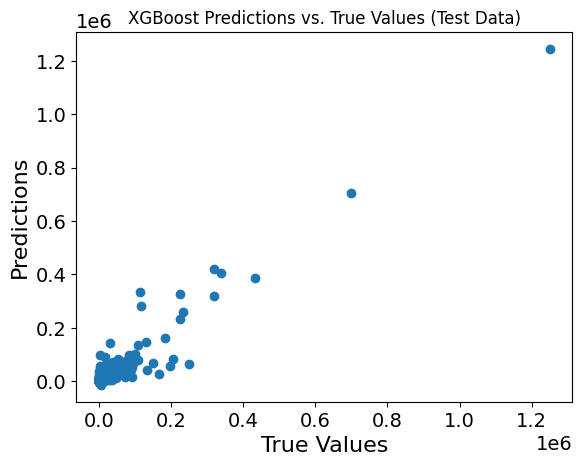

DecisionTree model saved as trained_models_ai6-2_revel/DecisionTree.pkl
____ Training Data _____
DecisionTree Regression Metrics (Training Data):
MSE Mean Squared Error [TRAIN]: 52763.801231850935
R-squared [TRAIN]: 0.9995647456894312
MAE Mean Absolute Error [TRAIN]: 31.398027229005997
DecisionTree Percent Accuracy (Training Data): 99.96%
____ Testing Data _____
DecisionTree Regression Metrics (Test Data):
MSE Mean Squared Error [TEST]: 25147117.704376027
R-squared [TEST]: 0.7317427110438517
MAE Mean Absolute Error [TEST]: 498.08543828719866
DecisionTree Percent Accuracy (Test Data): 73.17%


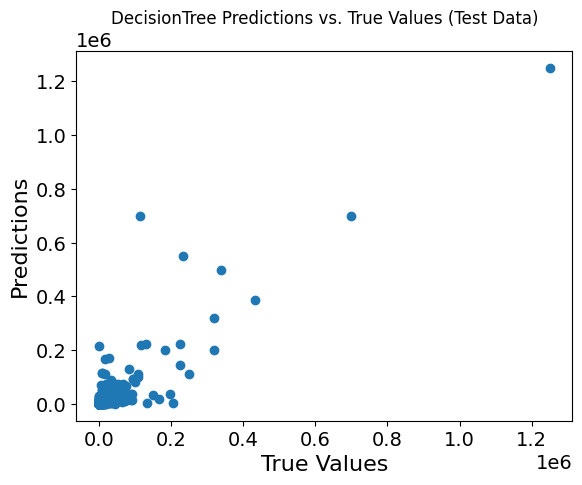

Bagging model saved as trained_models_ai6-2_revel/Bagging.pkl
____ Training Data _____
Bagging Regression Metrics (Training Data):
MSE Mean Squared Error [TRAIN]: 9149561.809488006
R-squared [TRAIN]: 0.9245242737554789
MAE Mean Absolute Error [TRAIN]: 201.2599809638217
Bagging Percent Accuracy (Training Data): 92.45%
____ Testing Data _____
Bagging Regression Metrics (Test Data):
MSE Mean Squared Error [TEST]: 24768522.23191748
R-squared [TEST]: 0.7357813844316623
MAE Mean Absolute Error [TEST]: 440.6944180214895
Bagging Percent Accuracy (Test Data): 73.58%


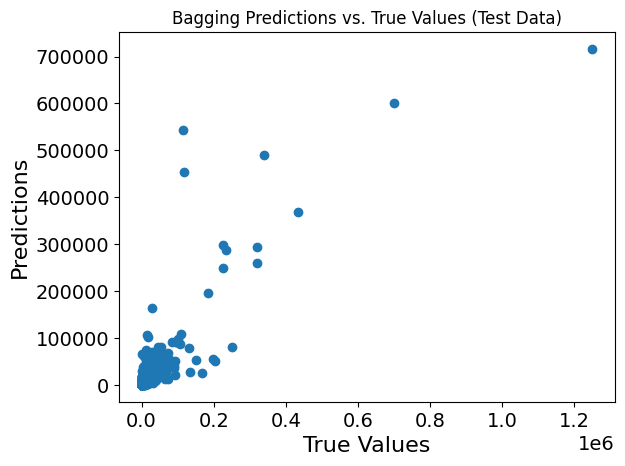

AdaBoost model saved as trained_models_ai6-2_revel/AdaBoost.pkl
____ Training Data _____
AdaBoost Regression Metrics (Training Data):
MSE Mean Squared Error [TRAIN]: 33620807.83488981
R-squared [TRAIN]: 0.7226583151081207
MAE Mean Absolute Error [TRAIN]: 2211.4076334673996
AdaBoost Percent Accuracy (Training Data): 72.27%
____ Testing Data _____
AdaBoost Regression Metrics (Test Data):
MSE Mean Squared Error [TEST]: 30752575.861534894
R-squared [TEST]: 0.6719463945723663
MAE Mean Absolute Error [TEST]: 2196.6227411662167
AdaBoost Percent Accuracy (Test Data): 67.19%


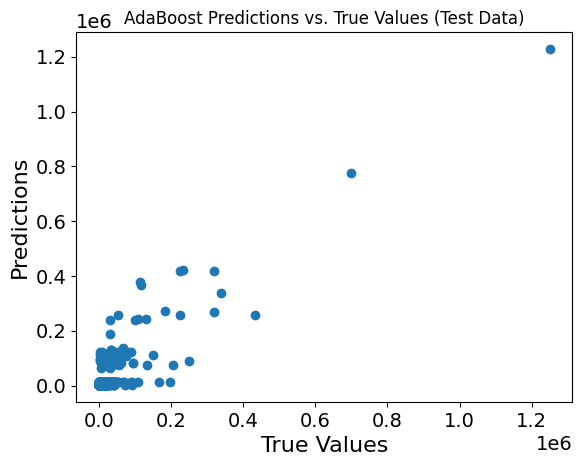

VotingRegressor model saved as trained_models_ai6-2_revel/VotingRegressor.pkl
____ Training Data _____
VotingRegressor Regression Metrics (Training Data):
MSE Mean Squared Error [TRAIN]: 2088596.0114210076
R-squared [TRAIN]: 0.982770945311289
MAE Mean Absolute Error [TRAIN]: 334.95769026138913
VotingRegressor Percent Accuracy (Training Data): 98.28%
____ Testing Data _____
VotingRegressor Regression Metrics (Test Data):
MSE Mean Squared Error [TEST]: 9115577.278758358
R-squared [TEST]: 0.902759430451767
MAE Mean Absolute Error [TEST]: 434.6911521032452
VotingRegressor Percent Accuracy (Test Data): 90.28%


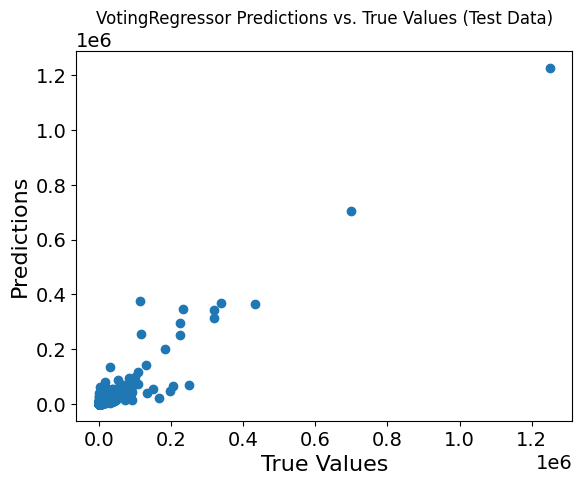

KNN_3 model saved as trained_models_ai6-2_revel/KNN_3.pkl
____ Training Data _____
KNN_3 Regression Metrics (Training Data):
MSE Mean Squared Error [TRAIN]: 18630591.890621882
R-squared [TRAIN]: 0.8463142298408431
MAE Mean Absolute Error [TRAIN]: 444.76558292190305
KNN_3 Percent Accuracy (Training Data): 84.63%
____ Testing Data _____
KNN_3 Regression Metrics (Test Data):
MSE Mean Squared Error [TEST]: 29607785.87246331
R-squared [TEST]: 0.6841584604839615
MAE Mean Absolute Error [TEST]: 653.200061712811
KNN_3 Percent Accuracy (Test Data): 68.42%


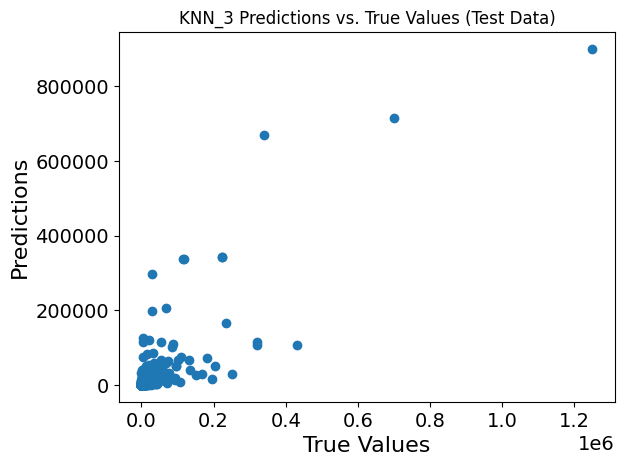

KNN_5 model saved as trained_models_ai6-2_revel/KNN_5.pkl
____ Training Data _____
KNN_5 Regression Metrics (Training Data):
MSE Mean Squared Error [TRAIN]: 32158839.965122305
R-squared [TRAIN]: 0.7347182463938391
MAE Mean Absolute Error [TRAIN]: 537.5743463868939
KNN_5 Percent Accuracy (Training Data): 73.47%
____ Testing Data _____
KNN_5 Regression Metrics (Test Data):
MSE Mean Squared Error [TEST]: 39744963.1166114
R-squared [TEST]: 0.5760199566143944
MAE Mean Absolute Error [TEST]: 655.5331369743893
KNN_5 Percent Accuracy (Test Data): 57.60%


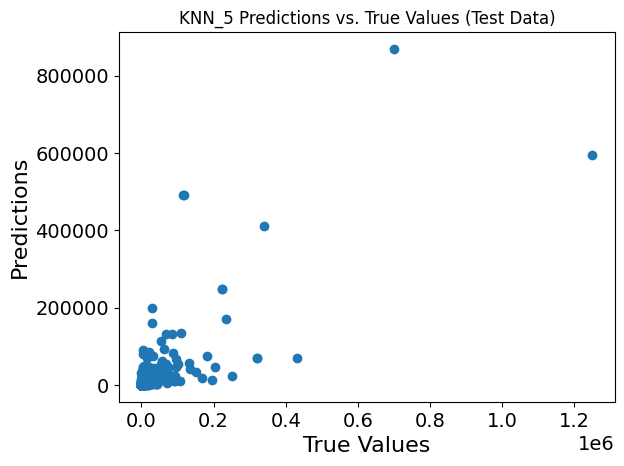

KNN_7 model saved as trained_models_ai6-2_revel/KNN_7.pkl
____ Training Data _____
KNN_7 Regression Metrics (Training Data):
MSE Mean Squared Error [TRAIN]: 70119024.48071249
R-squared [TRAIN]: 0.4215805733176111
MAE Mean Absolute Error [TRAIN]: 707.0504144581232
KNN_7 Percent Accuracy (Training Data): 42.16%
____ Testing Data _____
KNN_7 Regression Metrics (Test Data):
MSE Mean Squared Error [TEST]: 47692310.07084147
R-squared [TEST]: 0.4912415031392009
MAE Mean Absolute Error [TEST]: 671.6049427241887
KNN_7 Percent Accuracy (Test Data): 49.12%


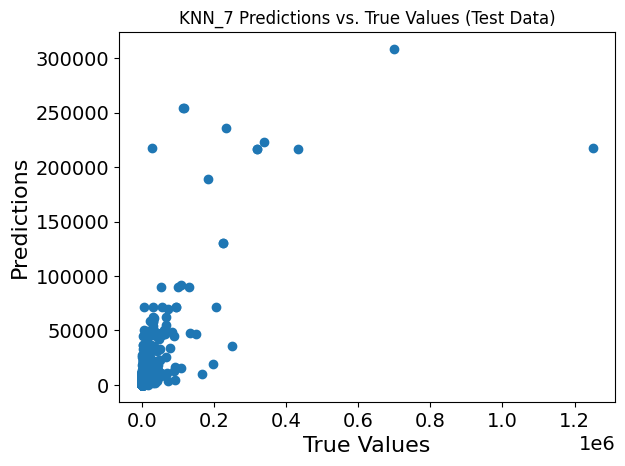

SVR model saved as trained_models_ai6-2_revel/SVR.pkl
____ Training Data _____
SVR Regression Metrics (Training Data):
MSE Mean Squared Error [TRAIN]: 121293465.1266295
R-squared [TRAIN]: -0.0005629296534741535
MAE Mean Absolute Error [TRAIN]: 976.7198344083167
SVR Percent Accuracy (Training Data): -0.06%
____ Testing Data _____
SVR Regression Metrics (Test Data):
MSE Mean Squared Error [TEST]: 93820841.42667861
R-squared [TEST]: -0.0008353587308260746
MAE Mean Absolute Error [TEST]: 955.4405814777318
SVR Percent Accuracy (Test Data): -0.08%


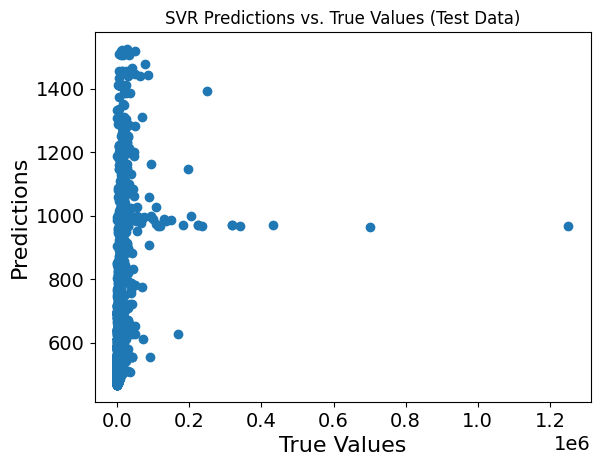

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression model saved as trained_models_ai6-2_revel/LogisticRegression.pkl
____ Training Data _____
LogisticRegression Regression Metrics (Training Data):
MSE Mean Squared Error [TRAIN]: 1435670014.6285837
R-squared [TRAIN]: -10.842997430675666
MAE Mean Absolute Error [TRAIN]: 2131.1485987993715
LogisticRegression Percent Accuracy (Training Data): -1084.30%
____ Testing Data _____
LogisticRegression Regression Metrics (Test Data):
MSE Mean Squared Error [TEST]: 1404687981.1995008
R-squared [TEST]: -13.984531988741209
MAE Mean Absolute Error [TEST]: 2104.4394232657296
LogisticRegression Percent Accuracy (Test Data): -1398.45%


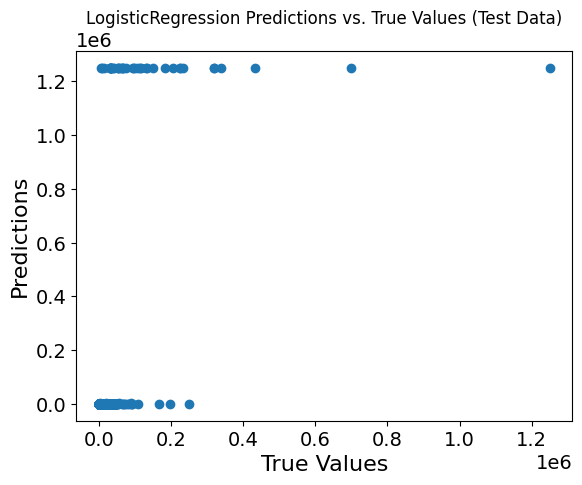

In [11]:
for model_name, model in models.items():
    # Train the model on the entire dataset and evaluate
    model.fit(X_train, y_train.values.ravel())
    get_regression_metrics(model_name, model, X_train, y_train, X_test, y_test)


In [12]:
# def get_single_input_from_user():
#     input_data = {}
#     print("Enter the values for the following features:")
#     for feature in features_columns:
#         value = input(f"{feature}: ")
#         input_data[feature] = float(value)  # Assuming all features are numeric
#     return input_data


# # Get a single input data point from the user
# input_data = get_single_input_from_user()

# # Function to test the input data with all models and return predictions


# def test_input_with_models(input_data, models):
#     predictions = {}
#     for model_name, model in models.items():
#         if model_name == "PolynomialRegression":
#             # Create a PolynomialFeatures transformer with the same degree as during training
#             degree = 2  # Set the degree of polynomial features
#             poly_features = PolynomialFeatures(
#                 degree=degree, include_bias=False)

#             # Transform the input data to polynomial features
#             input_data_poly = poly_features.transform(
#                 [list(input_data.values())])

#             # Predict using the transformed input data
#             prediction = model.predict(input_data_poly)
#         else:
#             # Ensure the input data is a 2D array-like structure
#             input_data_array = np.array(
#                 list(input_data.values())).reshape(1, -1)

#             # Predict using the input data
#             prediction = model.predict(input_data_array)

#         predictions[model_name] = prediction[0]
#     return predictions


# # Test the input data with all models
# predictions = test_input_with_models(input_data, models)

# # Print the input data
# print("\nInput Data:")
# for key, value in input_data.items():
#     print(f"{key}: {value}")

# # Print the predictions for each model
# print("\nPredictions:")
# for model_name, prediction in predictions.items():
#     print(f"{model_name} Prediction: {prediction}")
